In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\6_UK_Job_glassdoor2024\job_list_cleaned.csv')

sns.set_style('ticks')

# Remove data that dont contain salary
df = df_original.dropna(subset='salary').copy()

# make hourly salary to yearly salary (1950 hours per year)

def make_year(salary):
    if salary<1000:    return salary*1950
    else : return salary

df['salary']=df['salary'].apply(make_year)  




## Narrow down for 7 most posted data job:
    - Most required skills
    - Required skills and salary
    - Company Rating vs Salary by job title


In [4]:
top_7 = list(df.groupby(['cleaned_job_title'])['salary'].count().sort_values(ascending=False).head(7).index)

In [5]:
df_top7= df[df['cleaned_job_title'].isin(top_7)].copy()

- Most required skills

In [10]:
# Separate skill lists to count each skill
df_top7['skill_list'] = df_top7['skills'].str.split(',')
df_skills = df_top7.explode('skill_list')
df_skills['skill_list'] = df_skills['skill_list'].str.strip()

In [12]:
# Top 15 required skills
df_skills.groupby('skill_list').size().sort_values(ascending=False).head(15)

skill_list
SQL                      242
Azure                    175
Power BI                 126
Spark                     94
Data modelling            83
Microsoft Excel           79
R                         77
Data analysis skills      75
Communication skills      73
AWS                       73
Python                    71
Machine learning          68
Tableau                   64
Google Cloud Platform     58
Analysis skills           47
dtype: int64

Text(0.5, 0, 'Demands count')

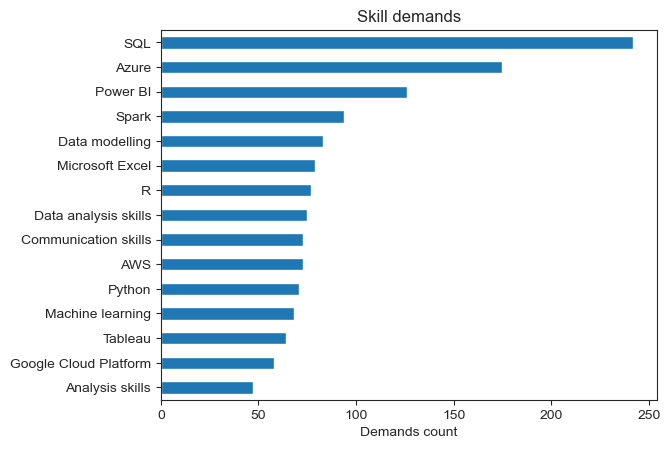

In [14]:
df_skills.groupby('skill_list').size().sort_values(ascending=False).head(15).plot(kind='barh')

plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Skill demands')
plt.xlabel('Demands count')


- SQL is most demanded skill also they ask communication skills as well


### Now we dive in to look at the relationship between salary and required skills
- Required skills and salary

In [15]:
df_skills_sal = df_skills.groupby('skill_list').agg(
    skill_count = ('skill_list', 'size'),
    avg_salary = ('salary','mean')
).sort_values(by ='skill_count', ascending =False).head(15).sort_values(by='avg_salary',ascending=False)

In [16]:
df_skills_sal['percent']= df_skills_sal['skill_count'].div(len(df_top7)/100)

In [17]:
df_skills_sal

,skill_count,avg_salary,percent
skill_list,,,
AWS,73,63082.191781,7.234886
Machine learning,68,62676.470588,6.739346
Google Cloud Platform,58,60896.551724,5.748266
Python,71,60352.112676,7.036670
Spark,94,59025.265957,9.316155
Azure,175,56767.000000,17.343905
Data modelling,83,56123.192771,8.225966
R,77,55285.714286,7.631318
SQL,242,55044.421488,23.984143


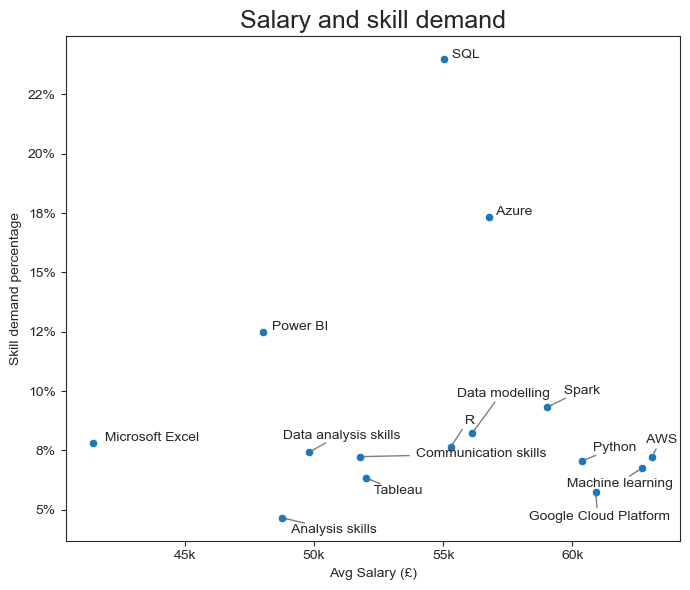

In [24]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_skills_sal, x= 'avg_salary', y= 'percent')

texts = []
for i, txt in enumerate(df_skills_sal.index):
    texts.append(plt.text(df_skills_sal['avg_salary'].iloc[i],df_skills_sal['percent'].iloc[i],  " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), expand=(1,2))

plt.ylabel('Skill demand percentage')
plt.title('Salary and skill demand',fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg Salary (£)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

- SQL is intensely required but not the highest pay skill.

### Company Rating vs Salary by job title

In [25]:
df_sal_rate = df_top7.groupby('cleaned_job_title').agg(
    avg_salary = ('salary','mean'),
    avg_rate=('rating','mean')
)

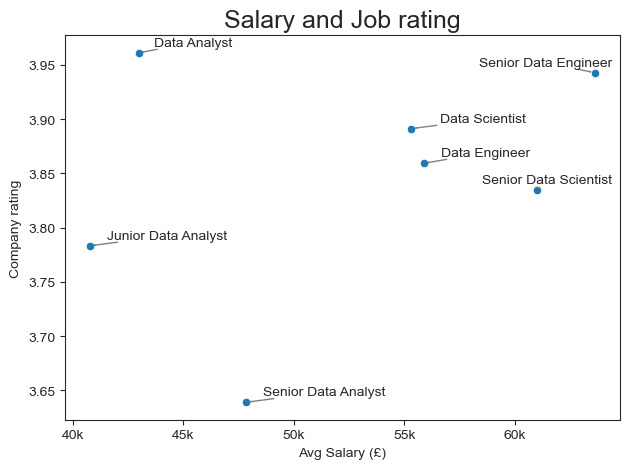

In [32]:
sns.scatterplot(data=df_sal_rate, x='avg_salary', y='avg_rate')

texts = []
for i, txt in enumerate(df_sal_rate.index):
    texts.append(plt.text(df_sal_rate['avg_salary'].iloc[i],df_sal_rate['avg_rate'].iloc[i], txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'),expand=(1.5,1.5))

plt.ylabel('Company rating')
plt.title('Salary and Job rating',fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg Salary (£)')

plt.tight_layout()
plt.show()
